<a href="https://colab.research.google.com/github/LucianoBV/Procesamiento-del-habla/blob/main/Desafio_Regresi%C3%B3n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDICACIONES

1) Cada uno debe completar las consignas indicadas en este notebook.

2) Deben postear como solución enlace a su notebook colab público y también debe estar en su repositorio GitHub.

3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# Dataset

Genere un dataset sintético con al menos 4 variables y una variable continua para usarlo luego en regresión.



Describa como generó los datos.

📊 Se crea un conjunto de datos con 1000 registros 📈, que incluirán 4 variables independientes (3 categóricas 🏷️ y 1 numérica 🔢) y una variable continua como objetivo para la regresión.

Las variables son:

Edad 👶🧑👵
Género 🚻
Ingreso 💰
Ciudad 🌆
Nivel educativo 🎓

In [92]:
import pandas as pd
import numpy as np

In [93]:
# Creamos semilla
np.random.seed(42)

In [94]:
# variables independientes
registros = 1000

# Edad: entre 20 y 70. Utilizamos el metodo randit para generar un número aleatorio dentro del rango especificado.
edad = np.random.randint(20, 70, registros)

# Género: valores categóricos masculino y femenino. Choice elige un valor al azar en el conjunto de elementos M y F.
genero = np.random.choice(["M", "F"], registros)

# Ingreso anual: valores entre 20000 y 100000
ingreso = np.random.randint(20000, 100000, registros)

# Ciudad: Ciudad 1, 2 y 3.
ciudad = np.random.choice(["Ciudada1", "Ciudada2", "Ciudada3"], registros)

# Nivel educativo: valores categóricos
nivel_educativo = np.random.choice(["Secundaria", "Universitaria", "Posgrado"], registros)

In [95]:
# Variable objetivo: valores continuos generados como una función de algunas variables
target_y = 0.5 * edad + 0.3 * ingreso / 1000 + np.random.normal(0, 10, registros)
target_y.shape

(1000,)

In [96]:
# Crear el DataFrame
data = pd.DataFrame({
    "edad": edad,
    "genero": genero,
    "ingreso": ingreso,
    "ciudad": ciudad,
    "nivel_educativo": nivel_educativo,
    "target": target_y})
data




,edad,genero,ingreso,ciudad,nivel_educativo,target
0,58,M,97236,Ciudada1,Posgrado,41.565973
1,48,M,56509,Ciudada2,Secundaria,59.149094
2,34,M,62534,Ciudada2,Secundaria,47.825719
3,62,F,38787,Ciudada1,Universitaria,70.137172
4,27,M,68845,Ciudada3,Secundaria,47.537137
...,...,...,...,...,...,...
995,45,M,25105,Ciudada3,Posgrado,24.248834
996,53,F,22839,Ciudada2,Universitaria,38.104415
997,64,F,88920,Ciudada2,Secundaria,60.662962
998,25,F,63619,Ciudada1,Posgrado,43.713544


## Preprocesamiento

Indique e implemente el pre-procesamiento necesario previo a entrenar los modelos

🔄 El preprocesamiento incluirá:

Codificación de variables categóricas 📊 (género , ciudad y nivel educativo) mediante OneHotEncoding 🔠.
Escalado de las variables numéricas 📏 (edad e ingreso ) para asegurar que todas las variables estén en una escala similar ⚖️, lo cual es mejor para varios algoritmos de regresión 📈.

📥 Importamos librerías de sklearn para:

Entrenar 🏋️‍♂️
Representar datos categóricos 📊
Estandarizar ⚖️
Transformar datos numéricos/categóricos 🔄
Ajustar (fit) 🤖 y predecir (predict) 🔮 con la misma estructura 📐.

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [98]:
# Separación de características y variable objetivo
X = data.drop(columns="target")
y = data["target"]

In [99]:
# Dividimos el conjuntos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Definición de las columnas categóricas y numéricas
características_categoricas = ["genero", "ciudad", "nivel_educativo"]
características_numéricas = ["edad", "ingreso"]

In [101]:
# Preprocesador: OneHotEncoding para variables categóricas y escalado para numéricas
Preprocesador = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), características_numéricas),
        ("cat", OneHotEncoder(drop="first"), características_categoricas)])

In [102]:
# Aplicación del preprocesador a los datos
X_train_preprocessed = Preprocesador.fit_transform(X_train)
X_test_preprocessed = Preprocesador.transform(X_test)

X_train_preprocessed.shape, X_test_preprocessed.shape


((800, 7), (200, 7))

✅ Los datos deberían estar listos para el entrenamiento de modelos de regresión 📉.

Se generaron 7 columnas 📊 después de la transformación 🔄:

2 columnas escaladas 📏 de las variables numéricas 🔢
5 columnas codificadas 🔠 para las variables categóricas.

## Modelos

Elija al menos dos modelos de regresión de los vistos en clases.
Entrene dichos modelos.
Detalle los hiperparámetros elegidos.

Entrenaré dos modelos de regresión:

Regresión Lineal y Regresión de Árbol de Decisión.

In [103]:
# Importamos las librerias de los modelos.
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Modelo de Regresión Lineal. Describirá las relaciones entre una variable continua y un conjunto de variables.

In [104]:
# 1. Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train_preprocessed, y_train)

LinearRegression()

🌳 Modelo de Árbol de Decisión (con hiperparámetro max_depth): este parámetro controla la profundidad máxima del árbol. Cuanto más profundo sea el árbol, más complejo será el modelo ⚙️.

Un árbol más profundo puede ajustar mejor los datos de entrenamiento , pero también puede provocar sobreajuste ⚠️. Podemos evitarlo limitando la profundidad estableciendo un valor máximo para max_depth 🚫.

In [105]:
# 2. Modelo de Árbol de Decisión (con hiperparámetro max_depth)
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Elegimos max_depth=5 para limitar la profundidad del árbol
tree_model.fit(X_train_preprocessed, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [106]:
# Parámetros de cada modelo
linear_params = linear_model.get_params()
tree_params = tree_model.get_params()

linear_params, tree_params

({'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False},
 {'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': 5,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'monotonic_cst': None,
  'random_state': 42,
  'splitter': 'best'})

📈 Los modelos seleccionados se han entrenado con los siguientes hiperparámetros:

Regresión Lineal 📉:

fit_intercept=True para ajustar el intercepto.

🌳Regresión de Árbol de Decisión:

max_depth=5  para limitar la profundidad del árbol y prevenir sobreajuste ⚠️.







## Evaluación

Evalue el desempeño de los modelos indicando las métricas, metodología y conjunto de datos utilizados.

📊 Se evaluó el rendimiento de ambos modelos usando las siguientes métricas 📈:

RMSE (Raíz del Error Cuadrático Medio): para evaluar la precisión en una escala similar a la variable objetivo 🎯.
R² 📐 (Coeficiente de Determinación): para medir la varianza explicada por el modelo.
Procedo a calcular estas métricas en el conjunto de prueba (X_test_preprocessed).

In [107]:
# Importamos las metricas
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test_preprocessed)
y_pred_tree = tree_model.predict(X_test_preprocessed)

# Cálculo de métricas para el modelo de regresión lineal
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

# Cálculo de métricas para el modelo de árbol de decisión
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

# Resultados de desempeño
performance = {
    "Modelo": ["Regresión Lineal", "Árbol de Decisión"],
    "RMSE": [rmse_linear, rmse_tree],
    "R^2": [r2_linear, r2_tree]}

performance



{'Modelo': ['Regresión Lineal', 'Árbol de Decisión'],
 'RMSE': [10.11564035667407, 10.299012846433394],
 'R^2': [0.46428356542185323, 0.44468499483824087]}

📈 Las métricas de desempeño se calcularon para ambos modelos. Ahora procederemos con el ajuste y prueba de hiperparámetros para el modelo de Árbol de Decisión.


## Ejercicio de hiper parámetro tunning.

Modificar uno de los modelos para probarlo con diferentes valores para uno de sus hiperparámetros, indicando para cuáles se evidencia subajuste y en cuáles sobreajuste.

Grafique la métrica de desempeño vs los valores del hiperarámetro para observar ambas curvas de error durante el entrenamiento y durante el testeo.




🔧 Se van a variar el hiperparámetro max_depth en diferentes valores para observar los efectos de subajuste y sobreajuste en el modelo.

Probaré valores entre 1 y 20 y analizaré las métricas de error ❌ en el conjunto de entrenamiento y el conjunto de prueba.

In [108]:
# Listas para almacenar los errores en entrenamiento y prueba
train_errors = []
test_errors = []
max_depth_values = range(1, 21)

# Probar diferentes valores de max_depth
for max_depth in max_depth_values:
    # Entrenar el modelo con el valor actual de max_depth
    temp_tree_model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    temp_tree_model.fit(X_train_preprocessed, y_train)

    # Calcular el error en el conjunto de entrenamiento y prueba
    y_train_pred = temp_tree_model.predict(X_train_preprocessed)
    y_test_pred = temp_tree_model.predict(X_test_preprocessed)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Almacenar los errores
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)

# Datos para graficar
max_depth_values, train_errors, test_errors


(range(1, 21),
 [12.653828379769065,
  11.040305571254246,
  10.300608777049101,
  9.628533903388938,
  9.096759163448148,
  8.509366460380777,
  7.7046060798517875,
  6.740018878787381,
  5.851578281310962,
  5.170461357772549,
  4.468896885504564,
  3.755389462799586,
  3.238557685057793,
  2.80251463727167,
  2.2257280366901155,
  1.733837375647926,
  1.3068801467538298,
  0.856529397823321,
  0.3774867175944171,
  0.07769411381602129],
 [12.440889197069232,
  11.139640937691432,
  10.544317705213059,
  10.684473910575127,
  10.299012846433394,
  11.172652855121148,
  12.117915729144906,
  12.668590518843464,
  13.098905131036195,
  13.239635862827273,
  13.008452635789563,
  13.25757048526017,
  13.628757641246358,
  13.654244490047066,
  13.565521576483505,
  14.004826441163042,
  13.99288932889783,
  13.701739857470358,
  13.751119366554079,
  13.743832680413071])

📈 Se recopilan los errores de entrenamiento y prueba para cada valor de max_depth.

Generamos el grafico del desempeño del modelo 📊 en términos de RMSE contra los valores de max_depth para observar dónde ocurre el subajuste y el sobreajuste.​

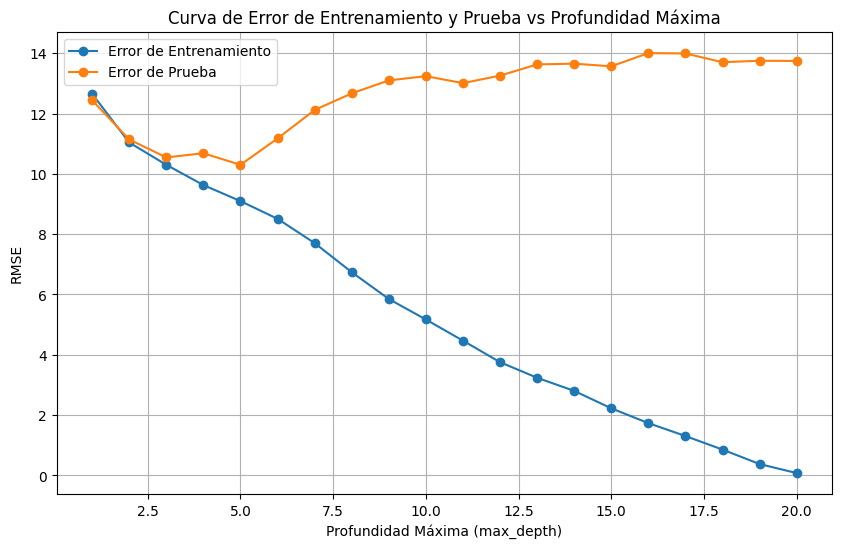

In [109]:
import matplotlib.pyplot as plt

# Graficar RMSE vs max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_errors, label="Error de Entrenamiento", marker="o")
plt.plot(max_depth_values, test_errors, label="Error de Prueba", marker="o")
plt.xlabel("Profundidad Máxima (max_depth)")
plt.ylabel("RMSE")
plt.title("Curva de Error de Entrenamiento y Prueba vs Profundidad Máxima")
plt.legend()
plt.grid(True)
plt.show()


📊 El gráfico muestra cómo el error en el conjunto de entrenamiento disminuye constantemente a medida que aumenta la profundidad máxima, lo cual indica un mejor ajuste al conjunto de datos de entrenamiento 🎯.

🔄 El error en el conjunto de prueba muestra un patrón diferente: disminuye inicialmente, pero luego comienza a aumentar, indicando sobreajuste a partir de cierto punto (alrededor de max_depth=5 a max_depth=10).

Subajuste: Se observa en valores bajos de max_depth (1-3), donde el modelo no captura bien la complejidad de los datos.
Sobreajuste: Empieza a evidenciarse a partir de max_depth > 10, donde el modelo se ajusta excesivamente a los datos de entrenamiento y pierde generalización.
Esto indica que elegir un valor de max_depth alrededor de 5 puede ofrecer un buen balance entre sesgo y varianza  en este caso.

🔗 Fuentes de inspiración 📚:

Curso ISSD 🖥️
Prom ChatGPT 💬
Curso de Aprendizaje Automático 🤖 en YouTube 📺 https://www.youtube.com/watch?v=Jt2MGE18reo&list=PLqlQ2-9ypflTGpDEVsj8uojcKKm0IpGV2